In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

In [3]:
data= pd.read_csv('Demographic_Data.csv')
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [4]:
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [6]:
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [7]:
X=data.drop(columns=['age'])
print('Summary of feature sample')
X.head()

Summary of feature sample


,in-store,items,amount,region
0,0,4,281.03,2
1,0,2,219.51,2
2,1,3,1525.70,4
3,1,3,715.25,3
4,1,4,1937.50,1


In [8]:
y = pd.cut(data['age'], bins=[17,29,59,85], labels=['1','2','3'])
y.value_counts()

2    50104
3    16254
1    13642
Name: age, dtype: int64

In [9]:
print(y)

0        2
1        2
2        2
3        2
4        2
        ..
79995    3
79996    2
79997    2
79998    2
79999    2
Name: age, Length: 80000, dtype: category
Categories (3, object): [1 < 2 < 3]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [24]:
algo = DecisionTreeClassifier(max_depth=3)
model = algo.fit(X_train, y_train)
preds = model.predict(X_test)

In [25]:
preds=model.predict(X_test)

In [26]:
print(classification_report(y_test,preds))

/Users/yuebingzheng/opt/anaconda3/envs/yanhuaenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00      4105
           2       0.63      1.00      0.77     15055
           3       0.00      0.00      0.00      4840

    accuracy                           0.63     24000
   macro avg       0.21      0.33      0.26     24000
weighted avg       0.39      0.63      0.48     24000



In [27]:
print(accuracy_score(y_test,preds))

0.6272083333333334


In [28]:
age_values = ['1','2','3']

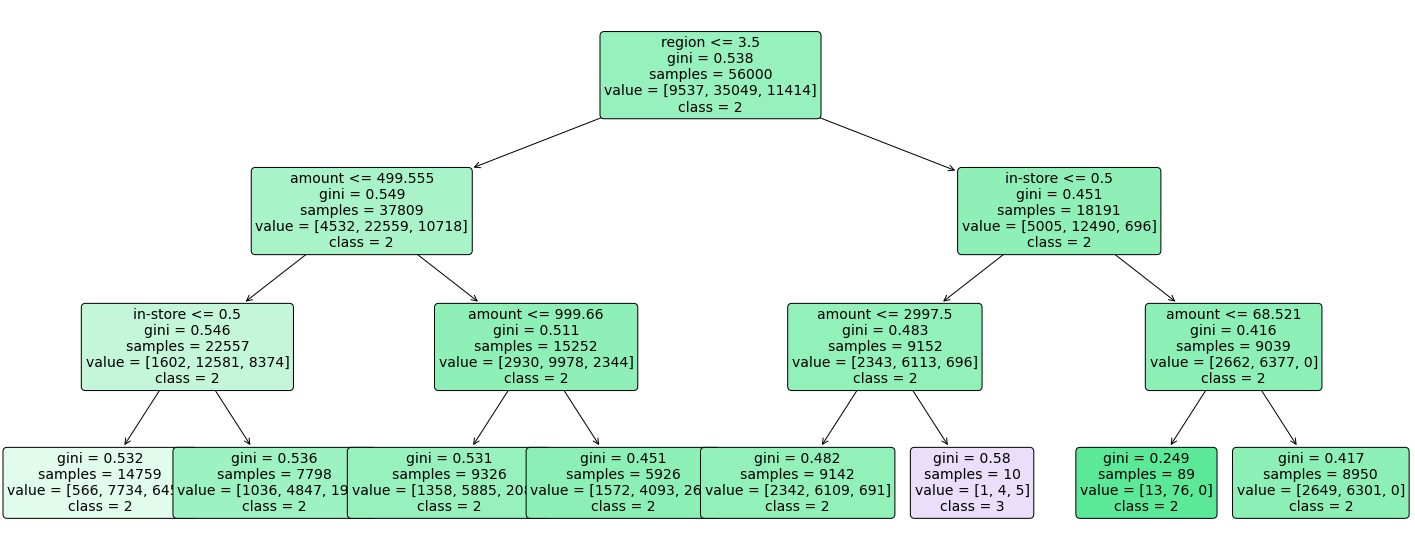

In [29]:
plt.figure(figsize=(25,10))
a=plot_tree(model,
           feature_names=X.columns,
           class_names=age_values,
           filled=True,
           rounded=True,
           fontsize=14)
plt.savefig('my_tree_age.png', transparent=True, bbox_inches='tight')
plt.show() 

In [17]:
algo_1 = GradientBoostingClassifier(n_estimators=100)
model_1 = algo_1.fit(X_train, y_train)
print(model_1)

GradientBoostingClassifier()


In [18]:
tree_100 = algo_1.estimators_[99, 0]

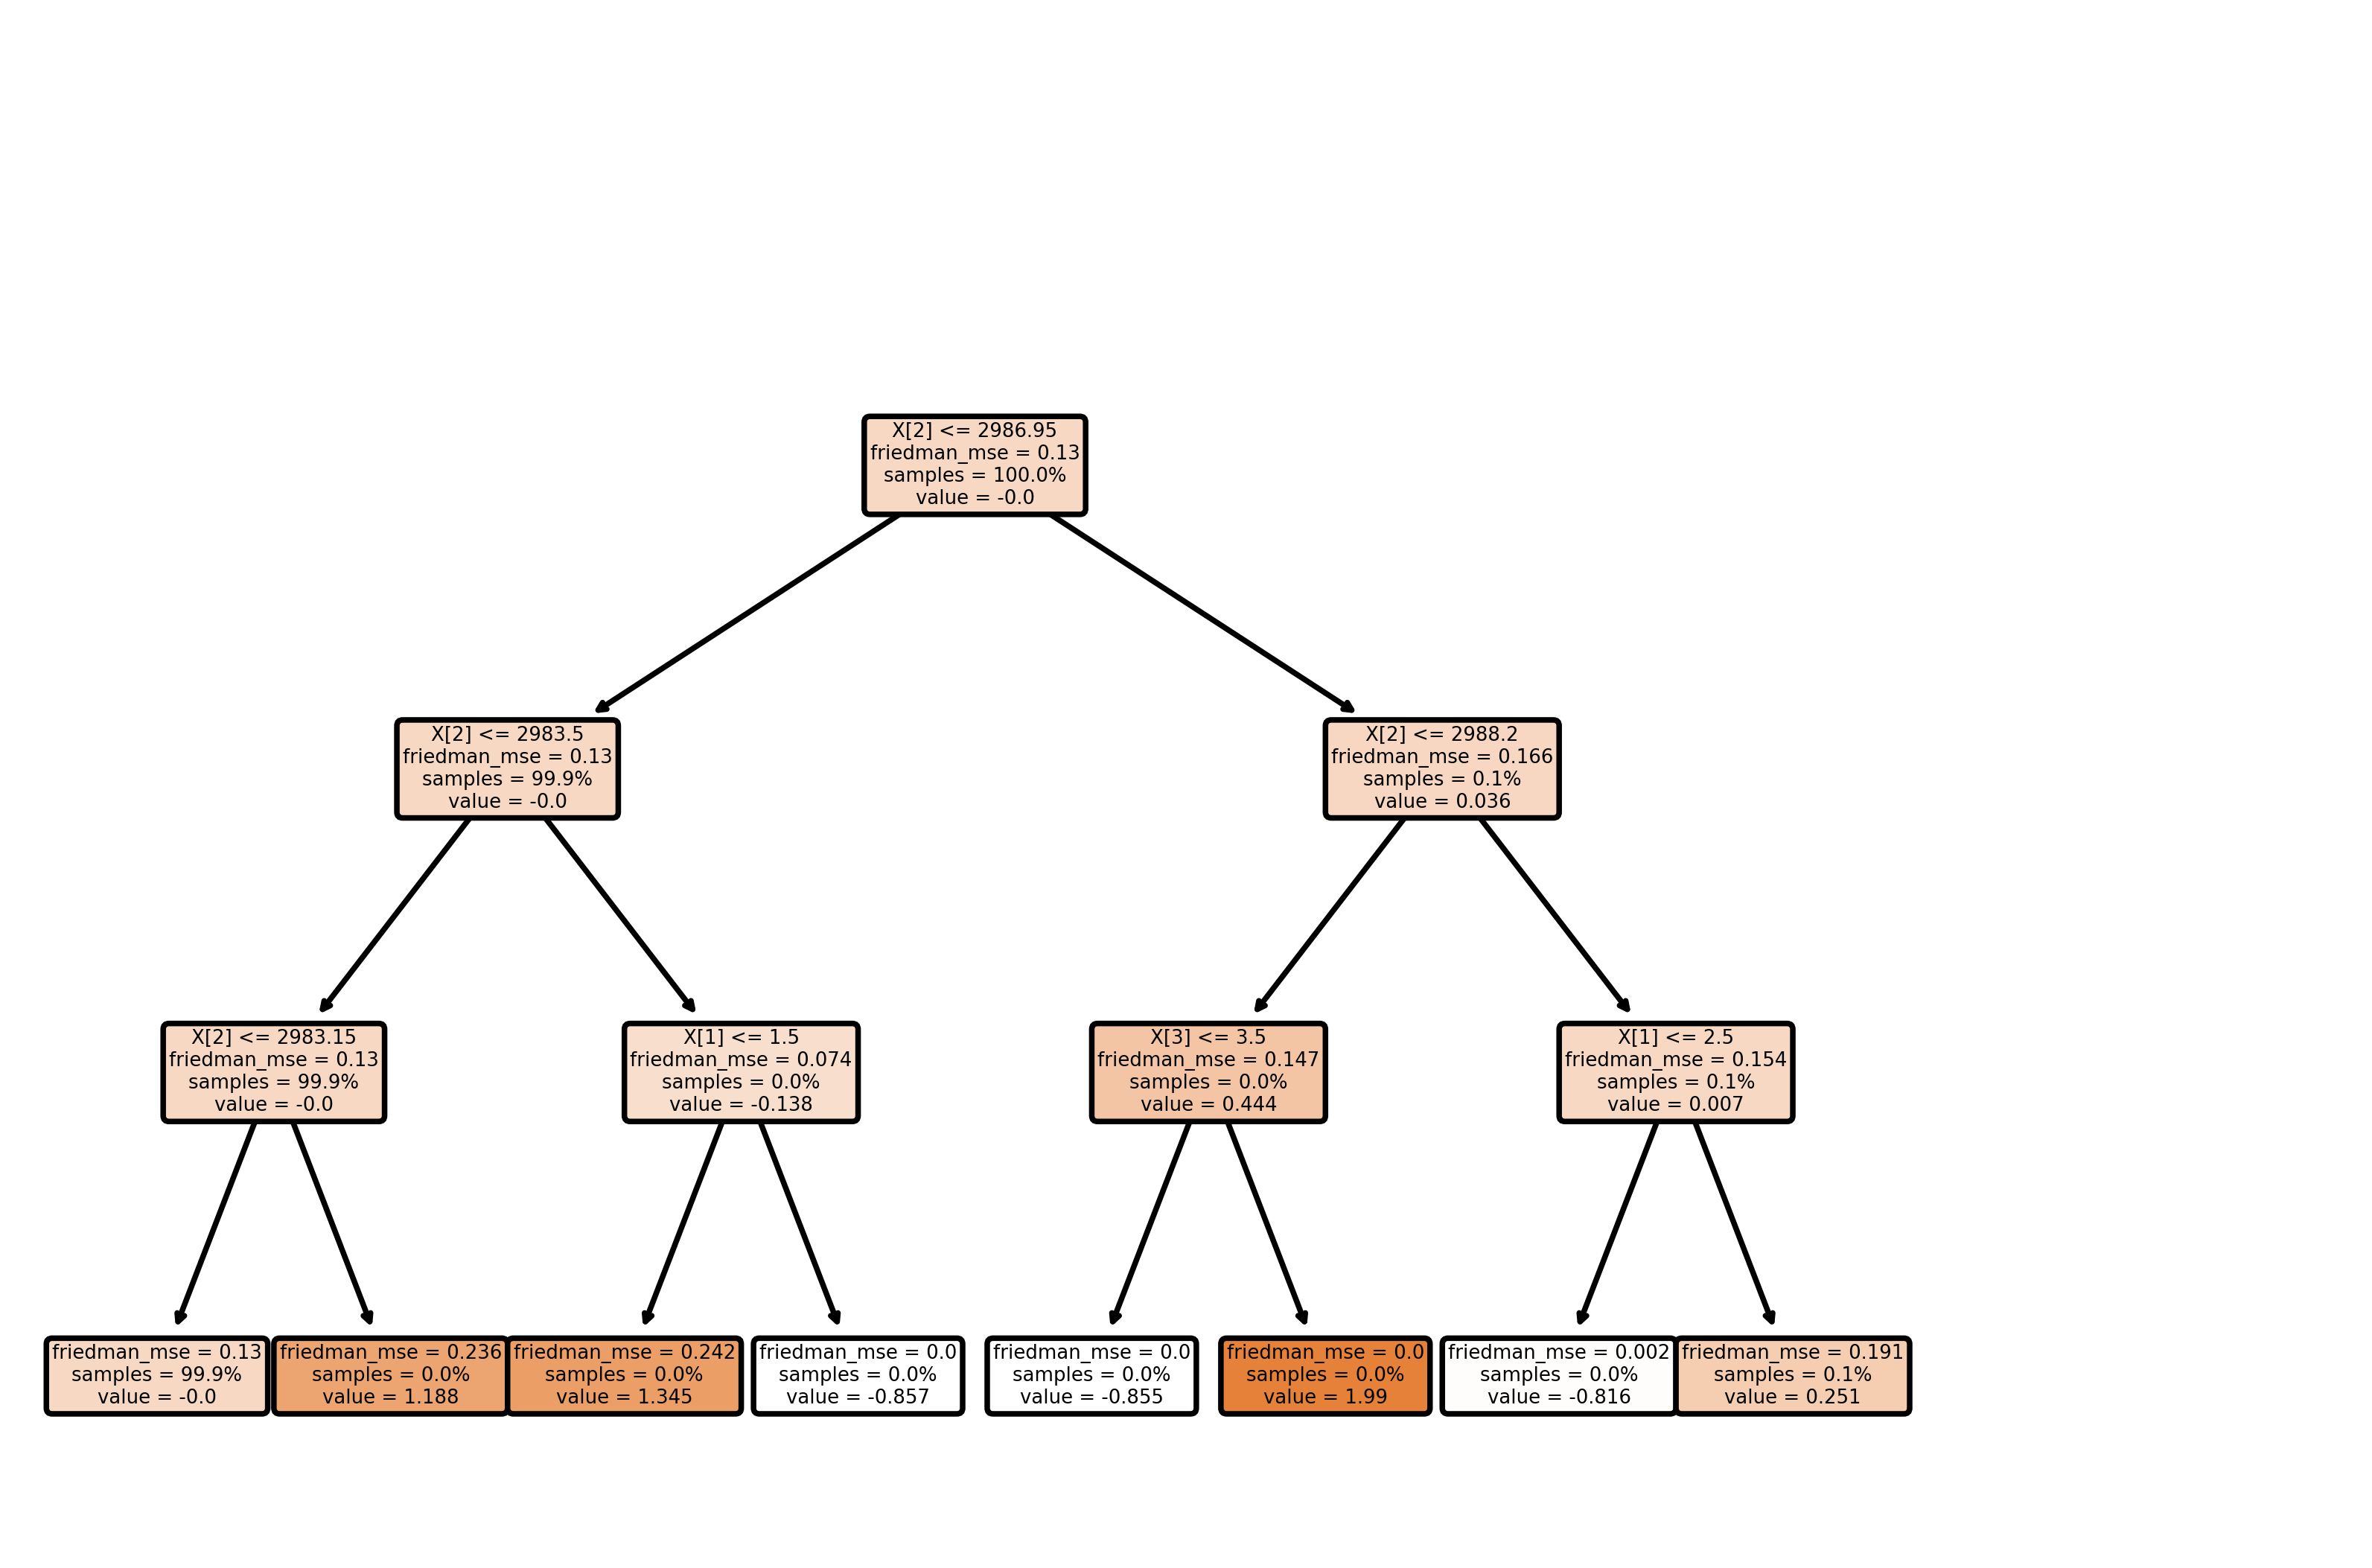

In [19]:
fig = plt.figure(dpi=540)
plot_tree(tree_100,
         filled=True,
         rounded=True,
         proportion=True,)
plt.tight_layout()
plt.savefig("tree_structure_age.png")
plt.show()

In [20]:
# Cross Validation Method
from sklearn.model_selection import cross_val_score


In [21]:
algos_Class=[]
algos_Class.append(('Random Forest Classifier', RandomForestClassifier(max_depth=3)))
algos_Class.append(('Decision Trees Classifier', DecisionTreeClassifier(max_depth=3)))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier(max_depth=3)))

In [22]:
results=[]
names=[]
for name, model in algos_Class:
    result=cross_val_score(model, X, y, cv=3,scoring='accuracy')
    names.append(name)
    results.append(result)

In [23]:
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Classifier 0.6263000000394693
Decision Trees Classifier 0.6262749994144537
Gradient Boosting Classifier 0.6259874969143325
